# Проект: классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [2]:
df = pd.read_csv('bank_fin.csv', sep = ';')

In [3]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
missing_values = df.isnull().sum()
print("Пропущенные значения в данных:")
print(missing_values)


Пропущенные значения в данных:
age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64


### Задание 2

In [4]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
missing_unknown_job = (df['job'] == 'unknown').sum()
print("Количество значений 'unknown' в столбце 'job':", missing_unknown_job)


Количество значений 'unknown' в столбце 'job': 70


### Задание 3

In [5]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df["balance"] = df["balance"].apply(lambda x: float(str(x).replace(",", ".").replace("$", "").replace(" ", "").strip()))
print(f"Среднее значение баланса: {df['balance'].mean():.3f}")


Среднее значение баланса: 1529.129


### Задание 4

In [6]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# Замена пропущенных значений в признаке balance на медианное значение
median_balance = df['balance'].median()
df['balance'].fillna(median_balance, inplace=True)

# Вычисление среднего значения после замены пропущенных значений
mean_balance_after_fillna = df['balance'].mean()

# Вывод результата с округлением до трех знаков после точки-разделителя
print("Среднее значение признака balance после замены пропусков:", round(mean_balance_after_fillna, 3))


Среднее значение признака balance после замены пропусков: 1526.936


### Задание 5

In [7]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
mod_job = df["job"].mode()[0]
df["job"] = df["job"].apply(lambda x: mod_job if x == "unknown" else x)

# Определение модального значения для education
mod_education = df["education"].mode()[0]
df["education"] = df["education"].apply(lambda x: mod_education if x == "unknown" else x)

# Маска для вычисления среднего баланса
mask = (df["job"] == mod_job) & (df["education"] == mod_education)

# Вычисление среднего баланса для клиентов с самой популярной работой и уровнем образования
mean_balance_popular = df[mask]["balance"].mean()

# Вывод результата с округлением до трех знаков после точки-разделителя
print(f"Средний баланс для клиентов с самой популярной работой и уровнем образования: {mean_balance_popular:.3f}")



Средний баланс для клиентов с самой популярной работой и уровнем образования: 1598.883


### Задание 6

In [8]:
# удалите все выбросы для признака balance
# обработка пропущенных значений и выбросов для признака balance
# ваш код
Q1 = df["balance"].quantile(0.25)
Q3 = df["balance"].quantile(0.75)
IQR = Q3-Q1
print(f"Нижняя граница поиска выбросов: {Q1-1.5*IQR}")
print(f"Верхняя граница поиска выбросов: {Q3+1.5*IQR}")
df = df[(df["balance"] >= Q1-1.5*IQR) & (df["balance"] <= Q3+1.5*IQR)]


Нижняя граница поиска выбросов: -2241.0
Верхняя граница поиска выбросов: 4063.0


In [9]:
# Подсчет количества объектов после удаления выбросов

print("Количество объектов после удаления выбросов:", len(df))


Количество объектов после удаления выбросов: 10105


## Часть 2:  Разведывательный анализ

### Задание 1

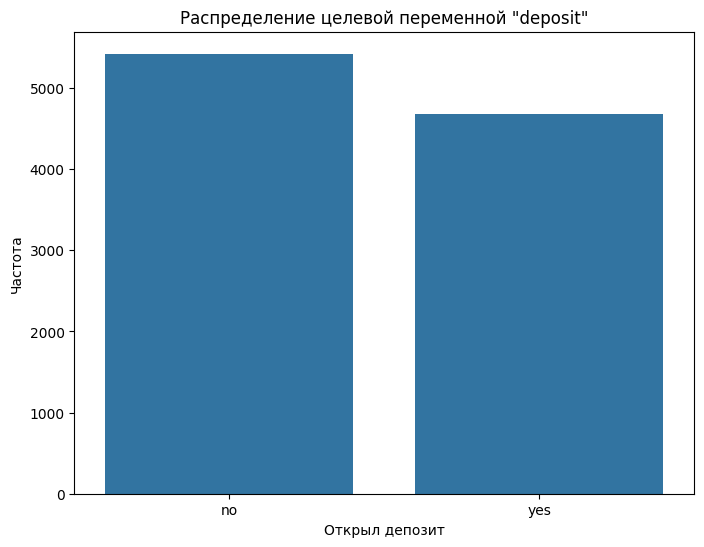

Количество клиентов, открывших депозит: 4681


In [10]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат

# Вычисление частот для клиентов, открывших и не открывших депозит
deposit_frequency = df['deposit'].value_counts()

# Построение диаграммы
plt.figure(figsize=(8, 6))
sns.barplot(x=deposit_frequency.index, y=deposit_frequency.values)
plt.title('Распределение целевой переменной "deposit"')
plt.xlabel('Открыл депозит')
plt.ylabel('Частота')
plt.show()

# Вывод количества клиентов, открывших депозит
num_clients_deposit_opened = deposit_frequency['yes']
print("Количество клиентов, открывших депозит:", num_clients_deposit_opened)


### Задания 2 и 3

Описательные статистики для переменной 'age':
count    10105.000000
mean        40.895497
std         11.734931
min         18.000000
25%         32.000000
50%         38.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Описательные статистики для переменной 'balance':
count    10105.000000
mean       807.653538
std        994.151966
min      -2049.000000
25%         95.000000
50%        445.000000
75%       1227.000000
max       4063.000000
Name: balance, dtype: float64


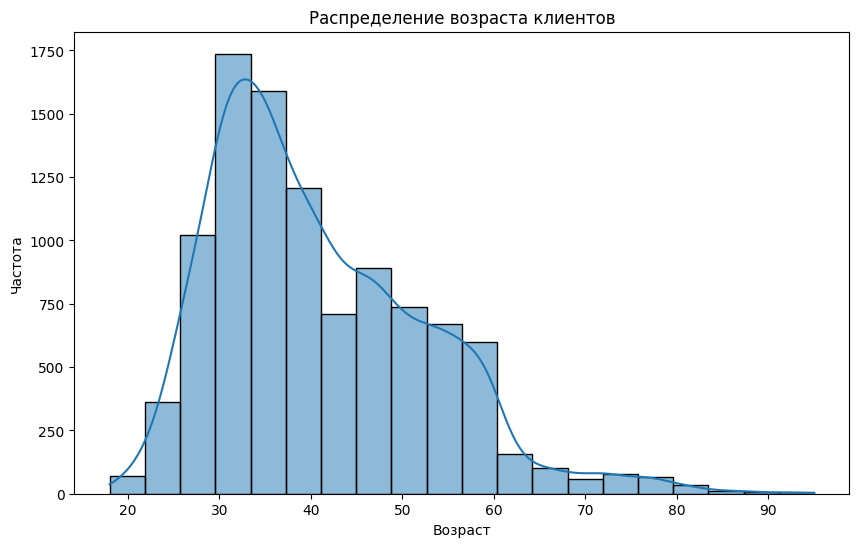

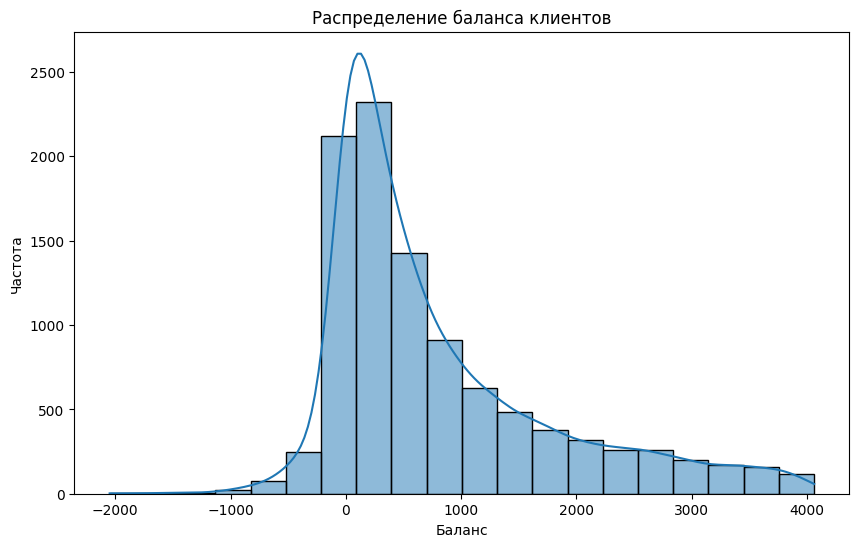

In [11]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
# Рассчитываем описательные статистики для возраста и баланса
age_stats = df['age'].describe()
balance_stats = df['balance'].describe()

# Выводим описательные статистики
print("Описательные статистики для переменной 'age':")
print(age_stats)
print("\nОписательные статистики для переменной 'balance':")
print(balance_stats)

# Визуализируем распределение возраста
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

# Визуализируем распределение баланса
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='balance', bins=20, kde=True)
plt.title('Распределение баланса клиентов')
plt.xlabel('Баланс')
plt.ylabel('Частота')
plt.show()

#ваш код

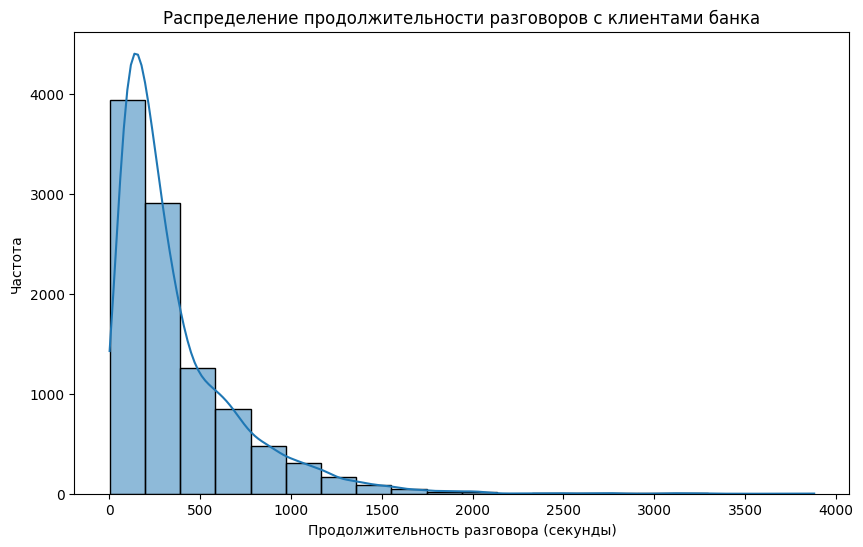

Минимальная продолжительность разговора с клиентом банка (в секундах): 2.0


In [12]:
# Рассчитываем описательные статистики для продолжительности разговора
duration_stats = df['duration'].describe()

# Выводим минимальное значение продолжительности разговора
min_duration = duration_stats['min']

# Визуализируем распределение продолжительности разговоров
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='duration', bins=20, kde=True)
plt.title('Распределение продолжительности разговоров с клиентами банка')
plt.xlabel('Продолжительность разговора (секунды)')
plt.ylabel('Частота')
plt.show()


print("Минимальная продолжительность разговора с клиентом банка (в секундах):", min_duration)


### Задания 4 и 5

Количество месяцев, в которых проводилась маркетинговая кампания: 12


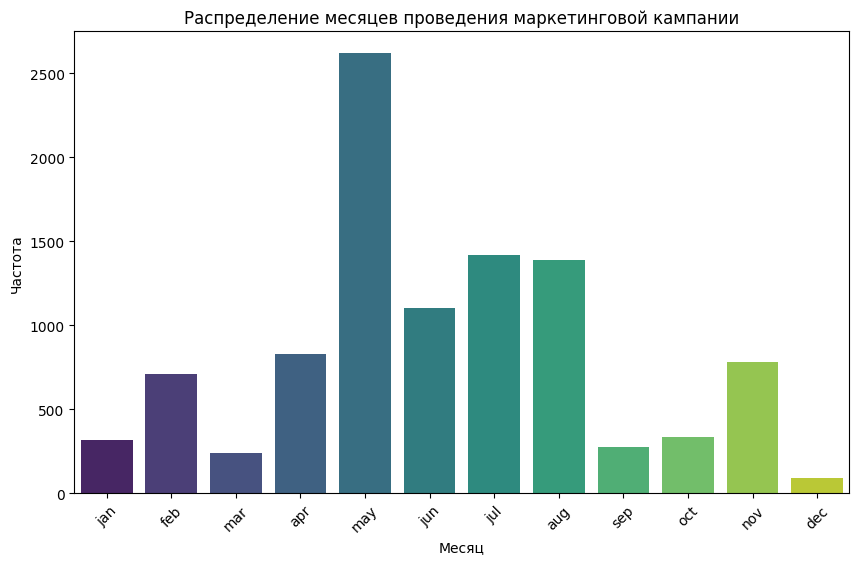

In [13]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
# Подсчитываем количество уникальных месяцев
num_campaign_months = df['month'].nunique()

print("Количество месяцев, в которых проводилась маркетинговая кампания:", num_campaign_months)
#ваш код

#постройте визуализации, иллюстрирующие результаты
# Сортируем месяцы по порядку
months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Строим график распределения месяцев проведения маркетинговой кампании
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', order=months_order, palette='viridis')
plt.title('Распределение месяцев проведения маркетинговой кампании')
plt.xlabel('Месяц')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()


Количество сфер занятости среди клиентов банка: 11


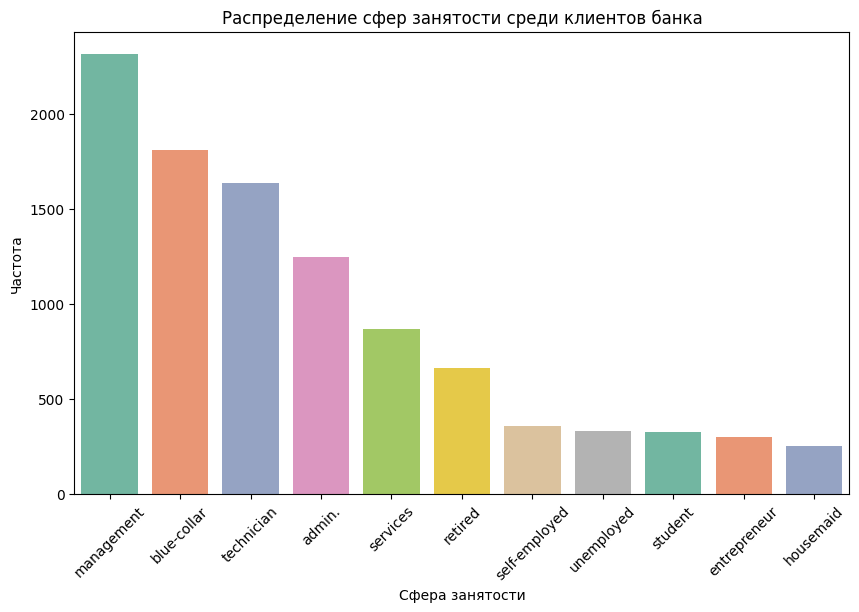

In [14]:
# Подсчитываем количество уникальных сфер занятости
num_job_categories = df['job'].nunique()

print("Количество сфер занятости среди клиентов банка:", num_job_categories)

# Строим график распределения сфер занятости
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index, palette='Set2')
plt.title('Распределение сфер занятости среди клиентов банка')
plt.xlabel('Сфера занятости')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()


### Задание 6

In [15]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# Группируем данные по статусу предыдущей кампании и целевой переменной
poutcome_deposit_counts = df.groupby(['poutcome', 'deposit']).size().unstack()

# Выводим количество успешных и неуспешных результатов для каждого статуса предыдущей кампании
print("Количество успешных и неуспешных результатов для каждого статуса предыдущей кампании:")
print(poutcome_deposit_counts)

# Вычисляем отношение успешных результатов к неуспешным для каждого статуса предыдущей кампании
poutcome_success_ratio = poutcome_deposit_counts['yes'] / poutcome_deposit_counts['no']

# Находим статус, для которого отношение успешных результатов к неуспешным наибольшее
max_success_ratio_poutcome = poutcome_success_ratio.idxmax()

print("\nСтатус предыдущей кампании, для которого в текущей успехов намного больше, чем неудач:", max_success_ratio_poutcome)
# ваш код

Количество успешных и неуспешных результатов для каждого статуса предыдущей кампании:
deposit     no   yes
poutcome            
failure    562   547
other      216   265
success     84   861
unknown   4562  3008

Статус предыдущей кампании, для которого в текущей успехов намного больше, чем неудач: success


### Задание 7

In [16]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# Группируем данные по месяцу и результату кампании
month_outcome_counts = df.groupby(['month', 'deposit']).size().unstack()

# Вычисляем процент неудач для каждого месяца
month_failure_percentage = (month_outcome_counts['no'] / (month_outcome_counts['yes'] + month_outcome_counts['no'])) * 100

# Находим месяц с наибольшим процентом неудач
max_failure_month = month_failure_percentage.idxmax()

print("Месяц с самым большим процентом неудач:", max_failure_month)
# ваш код

Месяц с самым большим процентом неудач: may


### Задание 8

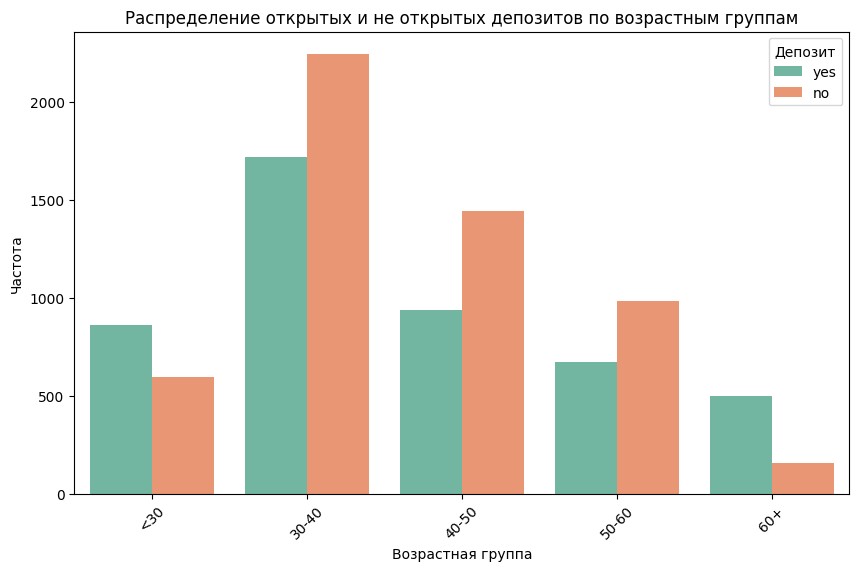

In [17]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
# Определяем границы возрастных категорий
age_bins = [0, 30, 40, 50, 60, float('inf')]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']

# Создаем новую переменную "age_group" с возрастными категориями
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Строим гистограмму распределения открытых и не открытых депозитов для каждой возрастной группы
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='deposit', palette='Set2')
plt.title('Распределение открытых и не открытых депозитов по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.legend(title='Депозит', loc='upper right')
plt.show()


### Задания 9 и 10

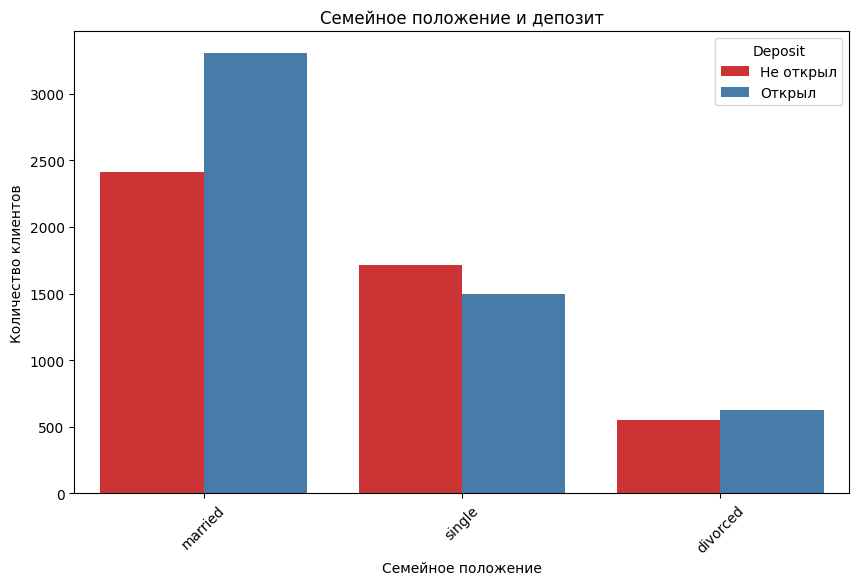

In [18]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital', hue='deposit', palette='Set1')
plt.title('Семейное положение и депозит')
plt.xlabel('Семейное положение')
plt.ylabel('Количество клиентов')
plt.legend(title='Deposit', loc='upper right', labels=['Не открыл', 'Открыл'])
plt.xticks(rotation=45)
plt.show()


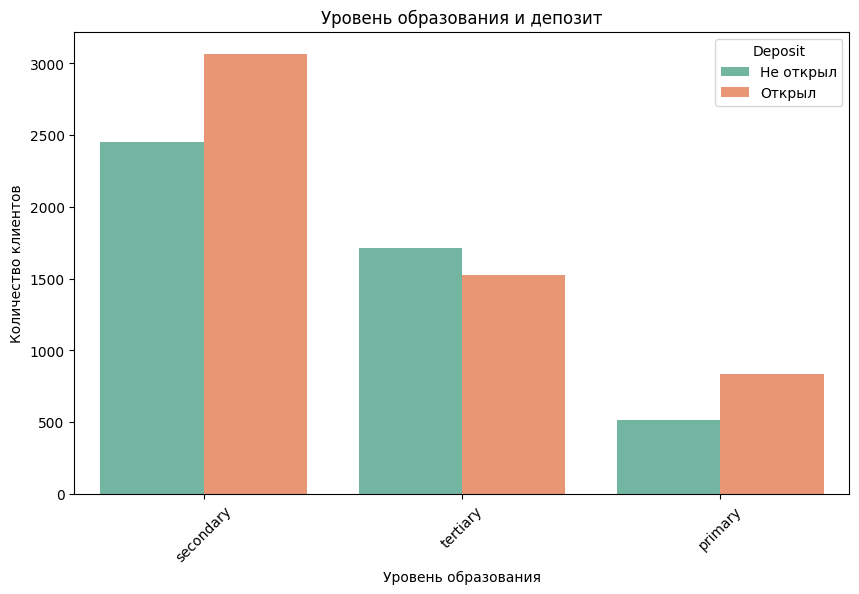

In [19]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', hue='deposit', palette='Set2')
plt.title('Уровень образования и депозит')
plt.xlabel('Уровень образования')
plt.ylabel('Количество клиентов')
plt.legend(title='Deposit', loc='upper right', labels=['Не открыл', 'Открыл'])
plt.xticks(rotation=45)
plt.show()


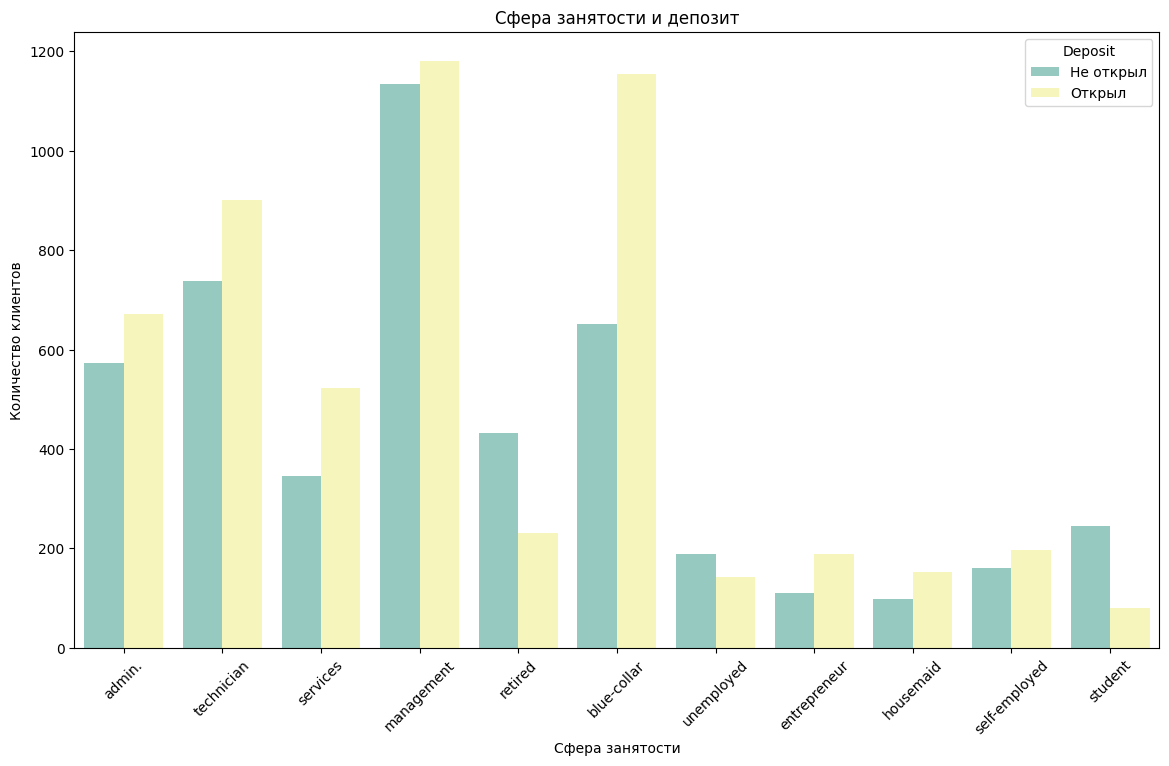

In [20]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='job', hue='deposit', palette='Set3')
plt.title('Сфера занятости и депозит')
plt.xlabel('Сфера занятости')
plt.ylabel('Количество клиентов')
plt.legend(title='Deposit', loc='upper right', labels=['Не открыл', 'Открыл'])
plt.xticks(rotation=45)
plt.show()


### Задание 11

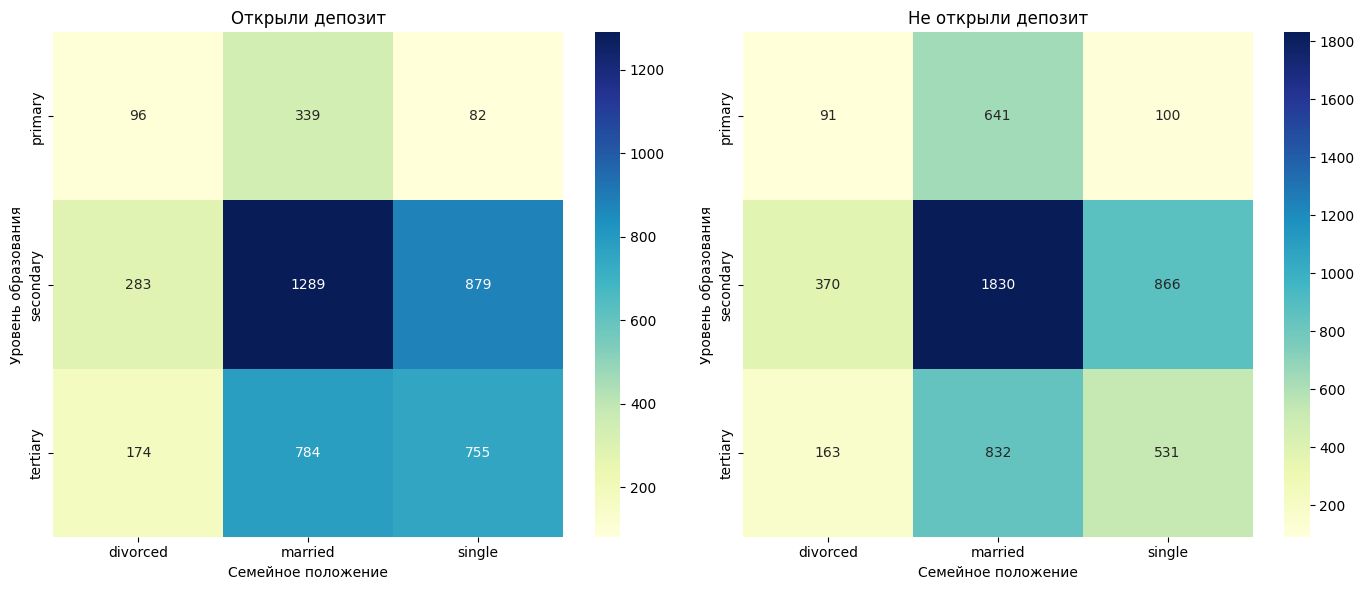

In [21]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
pivot_deposit_no = pd.pivot_table(df[df['deposit'] == 'no'],
                                  index='education',
                                  columns='marital',
                                  aggfunc='size',
                                  fill_value=0)

#(если рассматривать тех, кто открыл депозит)
pivot_deposit_yes = pd.pivot_table(df[df['deposit'] == 'yes'],
                                   index='education',
                                   columns='marital',
                                   aggfunc='size',
                                   fill_value=0)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(pivot_deposit_yes, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Открыли депозит')
plt.xlabel('Семейное положение')
plt.ylabel('Уровень образования')

plt.subplot(1, 2, 2)
sns.heatmap(pivot_deposit_no, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Не открыли депозит')
plt.xlabel('Семейное положение')
plt.ylabel('Уровень образования')

plt.tight_layout()
plt.show()



## Часть 3: преобразование данных

### Задание 1

In [22]:
# преобразуйте уровни образования
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["education"] = le.fit_transform(df["education"])
print(f"Сумма получившихся значений: {df['education'].sum()}")


Сумма получившихся значений: 11995


In [23]:

# Создаем интервалы для возраста
bins = [0, 30, 40, 50, 60, float('inf')]
labels = ['<30', '30-40', '40-50', '50-60', '60+']

# Применяем метод cut для создания порядковой переменной
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Создаем экземпляр LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем порядковую переменную в числовую
df['age_group'] = label_encoder.fit_transform(df['age_group'])
print(df)

       age          job  marital  education default  balance housing loan  \
0       59       admin.  married          1      no   2343.0     yes   no   
1       56       admin.  married          1      no     45.0      no   no   
2       41   technician  married          1      no   1270.0     yes   no   
3       55     services  married          1      no   2476.0     yes   no   
4       54       admin.  married          2      no    184.0      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single          0      no      1.0     yes   no   
11158   39     services  married          1      no    733.0      no   no   
11159   32   technician   single          1      no     29.0      no   no   
11160   43   technician  married          1      no      0.0      no  yes   
11161   34   technician  married          1      no      0.0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

### Задания 2 и 3

In [24]:
# преобразуйте бинарные переменные в представление из нулей и единиц
# Замена значений 'yes' на 1 и 'no' на 0
df['deposit'] = df['deposit'].replace({'yes': 1, 'no': 0})

# Вычисление стандартного отклонения
std_deviation = df['deposit'].std()

# Вывод результата с округлением до трех знаков после точки-разделителя
print("Стандартное отклонение целевой переменной deposit:", round(std_deviation, 3))


Стандартное отклонение целевой переменной deposit: 0.499


### Задание 4

In [25]:
# создайте дамми-переменные

# Преобразование бинарных переменных в дамми-переменные
df["default"] = df["default"].apply(lambda x: 1 if x == "yes" else 0)
df["housing"] = df["housing"].apply(lambda x: 1 if x == "yes" else 0)
df["loan"] = df["loan"].apply(lambda x: 1 if x == "yes" else 0)

# Вычисление суммы средних арифметических для каждой группы
mean_ar = df["default"].mean() + df["housing"].mean() + df["loan"].mean()
print(f"Сумма средних арифметических для каждой группы {mean_ar:.3f}")



Сумма средних арифметических для каждой группы 0.635


In [26]:
# Создание дамми-переменных только для номинальных переменных
nominal_dummies = pd.get_dummies(df[['job', 'marital', 'contact', 'month', 'poutcome']])

# Добавление дамми-переменных в набор данных
df = pd.concat([df, nominal_dummies], axis=1)

# Определение общего количества признаков в наборе данных, не считая целевую переменную
total_features = len(df.columns) - 1 # Вычитаем один, так как учитываем только признаки, не считая целевую переменную

# Вывод результата
print("Всего признаков в датасете, не считая целевую переменную:", total_features)


Всего признаков в датасете, не считая целевую переменную: 50


### Задания 5 и 6

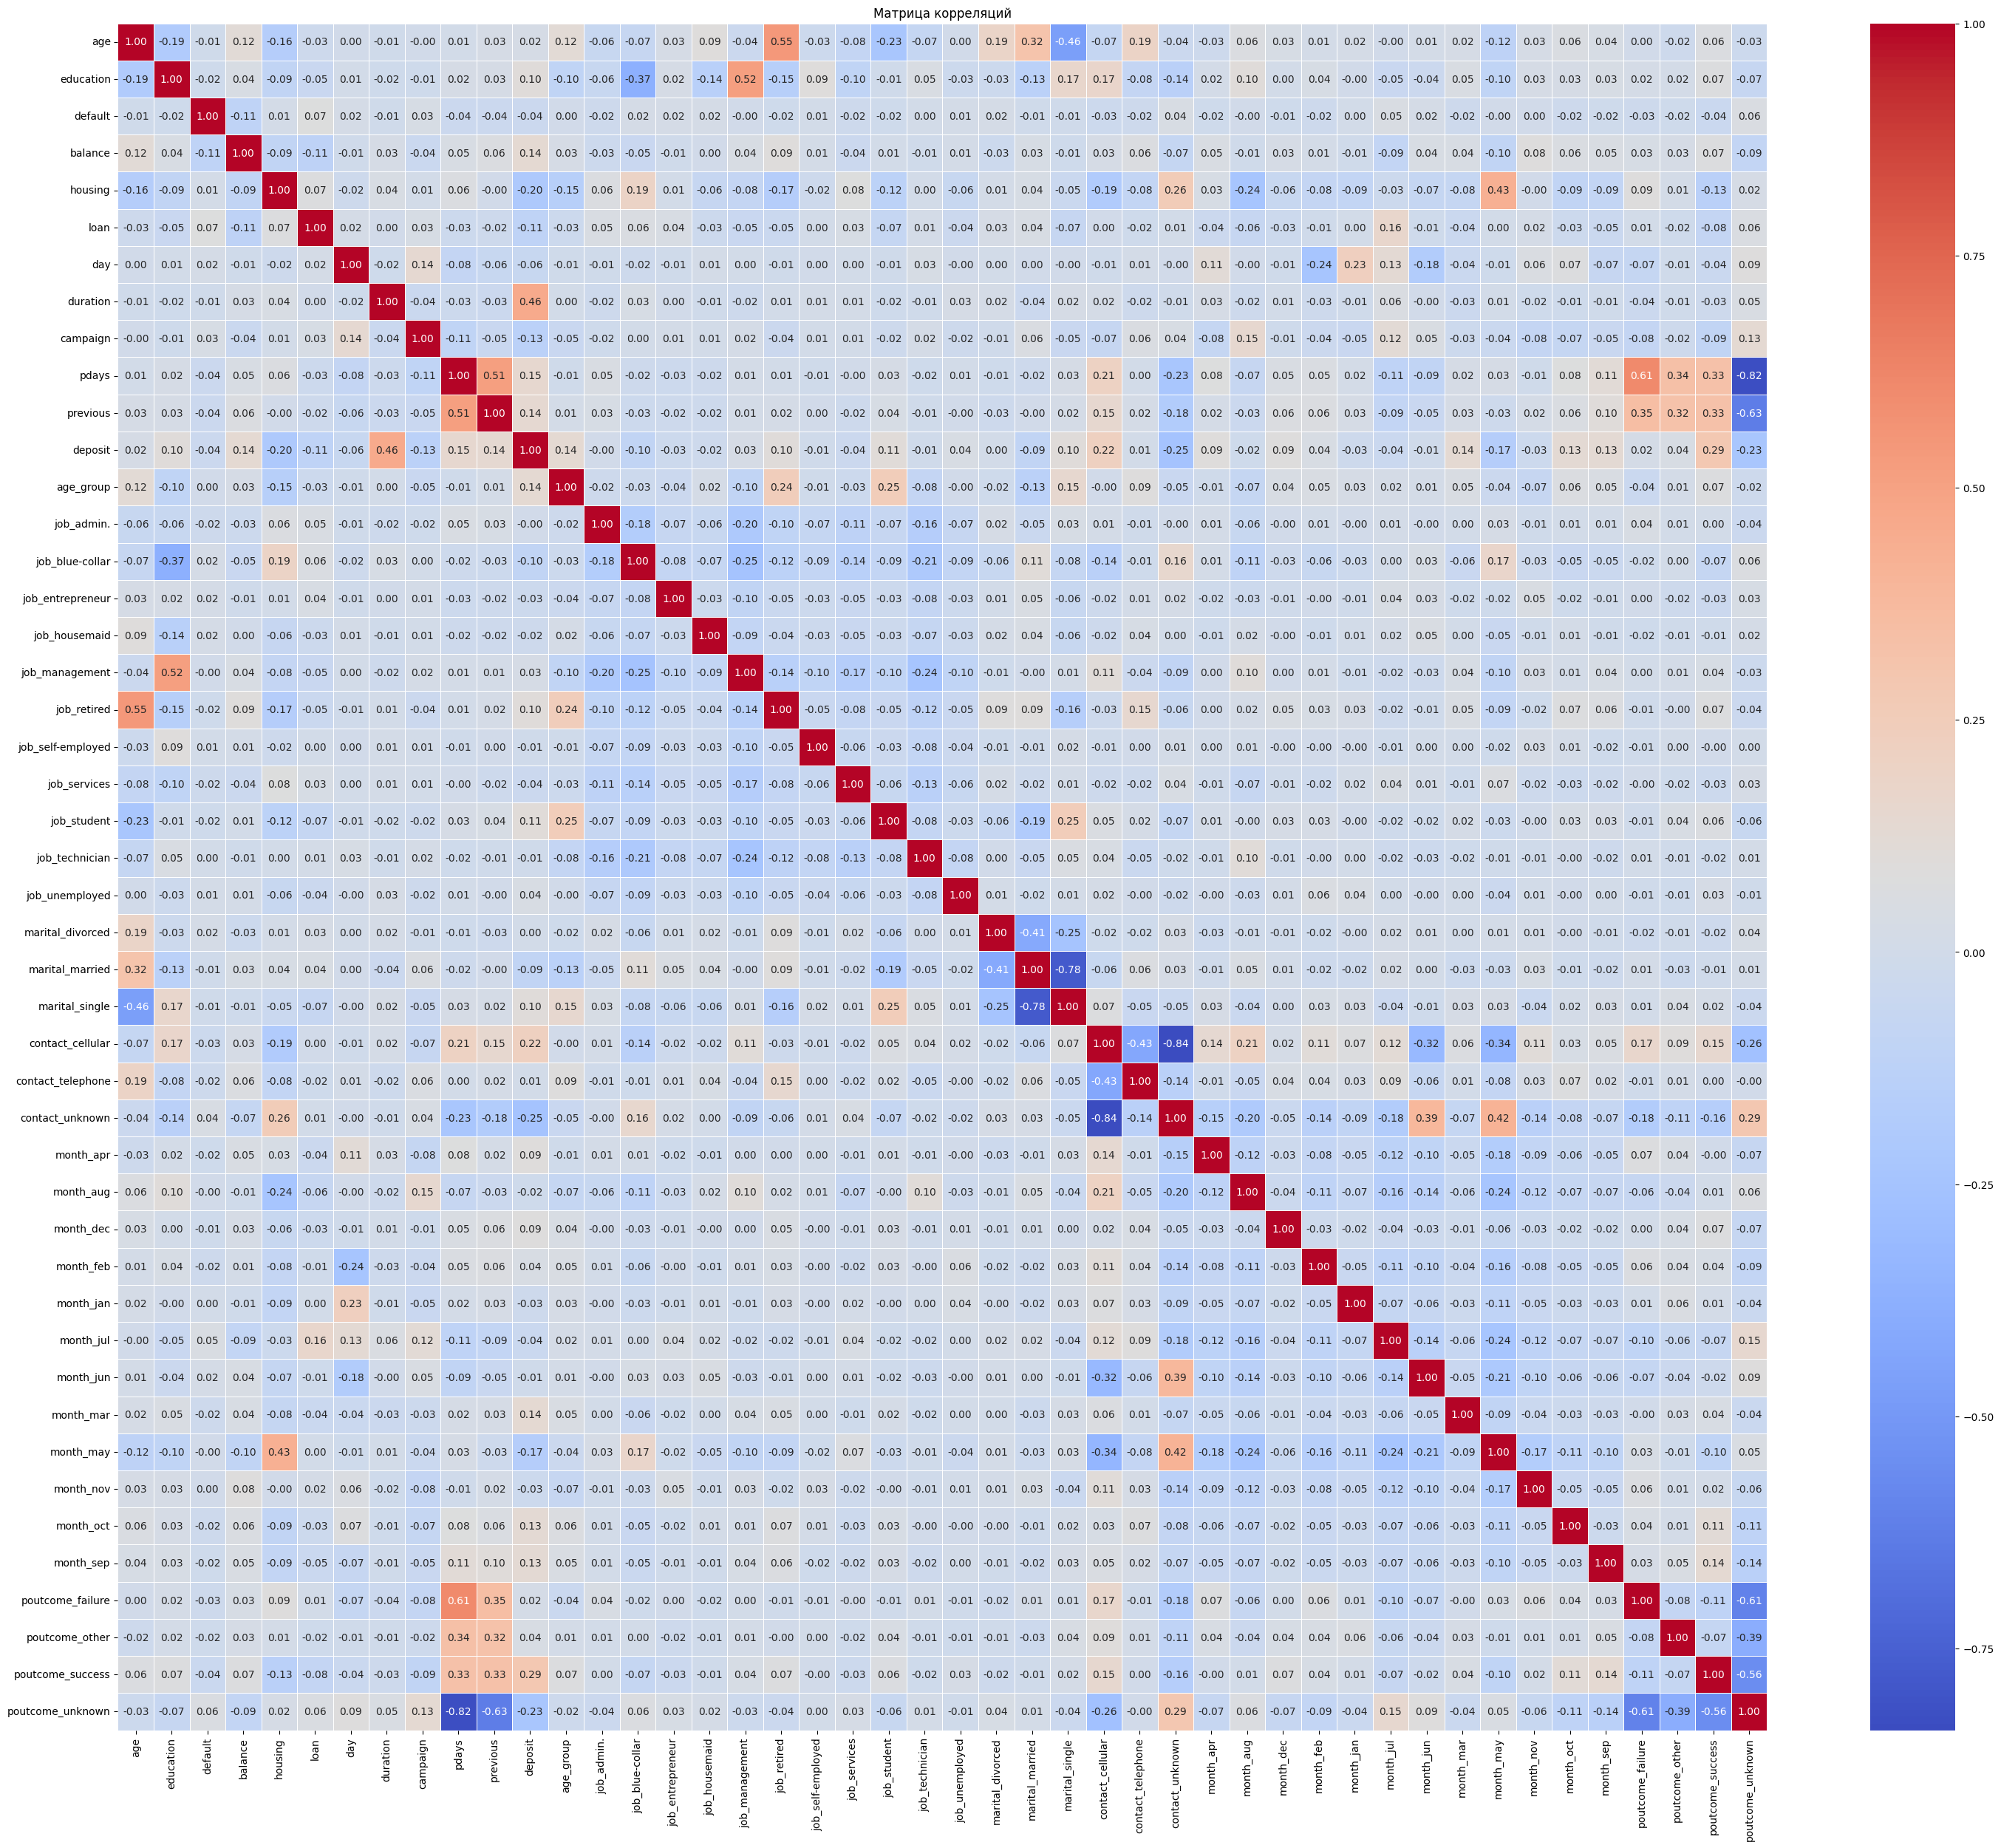

In [27]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарност
# Построение матрицы корреляций
corr_matrix = (df.corr(numeric_only=True))

# Построение тепловой карты
plt.figure(figsize=(36, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляций')
plt.show()



Из графика мы можем увидеть, что целевая переменная больше всего коррелирует с переменной  duration (0.46). Следовательно, у целевой переменной есть умеренная зависимость от времени. Далее идут переменные poutcome_success (0.29)  и contact_cellular (0.22), они также коррелируют с целевой переменной, но связь между ними и целевой переменной уже можно отнести к слабой.  Среди признаков мультиколлинеарность (значение более 0,9) отсутствует.

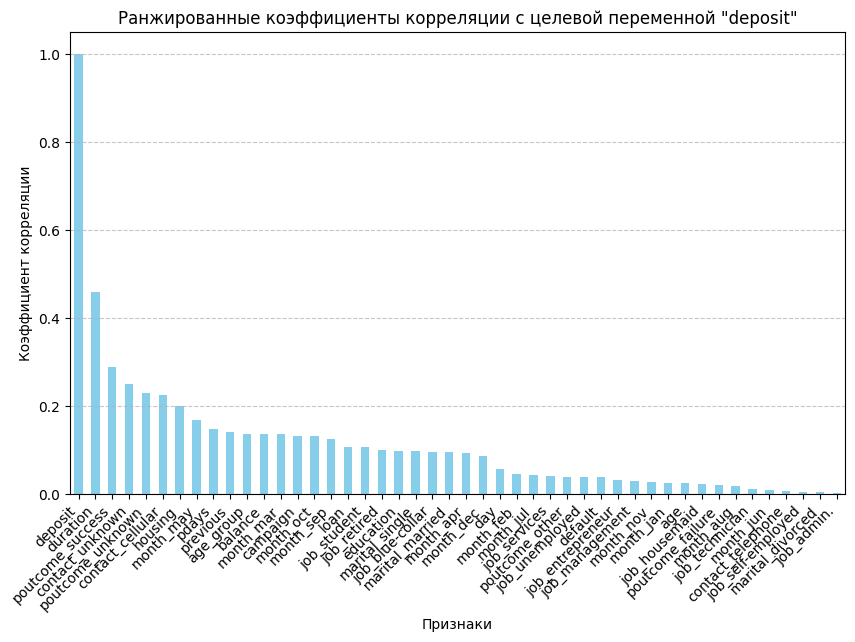

In [28]:
# Получение абсолютных значений коэффициентов корреляции с целевой переменной и их сортировка
correlation_with_target = corr_matrix['deposit'].abs().sort_values(ascending=False)

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title('Ранжированные коэффициенты корреляции с целевой переменной "deposit"')
plt.xlabel('Признаки')
plt.ylabel('Коэффициент корреляции')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Столбчатая диаграмма показала корреляцию в порядке убывания с переменными  contact_unknown -0.25 и poutcome_unknown -0.23, но она обратная.

### Задания 7 и 8

In [29]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [30]:
# рассчитайте необходимые показатели
print("Размер тестовой выборки:", X_test.shape[0])


Размер тестовой выборки: 3335


In [31]:
mean_target = y_test.mean()
print("Среднее значение целевой переменной на тестовой выборке:", round(mean_target, 2))


Среднее значение целевой переменной на тестовой выборке: 0.46


### Задание 9

In [32]:
from sklearn.preprocessing import LabelEncoder

# Создаем объект LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем булевые значения в числовые значения для всех выборок
for col in X_train.columns:
    if X_train[col].dtype == 'bool':
        X_train[col] = label_encoder.fit_transform(X_train[col])

for col in X_test.columns:
    if X_test[col].dtype == 'bool':
        X_test[col] = label_encoder.transform(X_test[col])




In [54]:
from sklearn.feature_selection import SelectKBest, f_classif

# Убедимся, что все признаки числовые
X_train_numeric = X_train.select_dtypes(include=['number'])

# Применим SelectKBest
selector = SelectKBest(score_func=f_classif, k= 15)
X_train_selected = selector.fit_transform(X_train_numeric, y_train)

# Получим индексы отобранных признаков
selected_features_index = selector.get_support(indices=True)

# Получим имена отобранных признаков
selected_features_names = X_train_numeric.columns[selected_features_index].tolist()

# Выведем имена отобранных признаков
print("Отобранные признаки:", selected_features_names)


Отобранные признаки: ['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous', 'age_group', 'contact_cellular', 'contact_unknown', 'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_success', 'poutcome_unknown']


### Задание 10

In [55]:
from sklearn.preprocessing import MinMaxScaler
# Создаем объект MinMaxScaler
scaler = MinMaxScaler()

# Нормализуем отобранные признаки
X_train_normalized = scaler.fit_transform(X_train_selected)

# Выводим нормализованные данные
print("Нормализованные данные:")
print(X_train_normalized)
# Вычисляем среднее арифметическое для первого предиктора
mean_first_predictor = X_train_normalized[:, 0].mean()

# Выводим среднее арифметическое для первого предиктора
print("Среднее арифметическое для первого предиктора:", round(mean_first_predictor, 3))


Нормализованные данные:
[[0.42637435 1.         0.13173498 ... 0.         0.         1.        ]
 [0.34653141 0.         0.07579273 ... 0.         0.         0.        ]
 [0.33524215 1.         0.10234597 ... 0.         0.         0.        ]
 ...
 [0.87909031 0.         0.03093581 ... 0.         1.         0.        ]
 [0.36943717 0.         0.15545244 ... 0.         0.         1.        ]
 [0.36272906 0.         0.10105697 ... 0.         0.         1.        ]]
Среднее арифметическое для первого предиктора: 0.467


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [37]:
from sklearn.linear_model import LogisticRegression

# Создание модели логистической регрессии с параметрами
model = LogisticRegression(solver='sag', random_state=42, max_iter=1000)

# Обучение модели на обучающей выборке
model.fit(X_train_normalized, y_train)

# Прогнозирование значений на тестовой выборке
y_pred_train = model.predict(X_train_normalized)
y_pred_test = model.predict(X_test_normalized)

print(f"Значение accuracy на тестовой выборке {metrics.accuracy_score(y_test, y_pred_test):.3f}")



Значение accuracy на тестовой выборке 0.805


### Задания 2,3,4

In [39]:
# обучите решающие деревья, настройте максимальную глубину
from sklearn.tree import DecisionTreeClassifier

# Создание списка для сохранения значений accuracy для каждой глубины
accuracies = []

# Попробуем разные значения для max_depth
for depth in range(1, 11):
    # Создание модели решающего дерева с заданной глубиной
    tree_model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth)

    # Обучение модели на обучающей выборке
    tree_model.fit(X_train_normalized, y_train)

    # Прогнозирование значений на тестовой выборке
    y_pred_test = tree_model.predict(X_test_normalized)

    # Вычисление accuracy и добавление его в список
    accuracy = metrics.accuracy_score(y_test, y_pred_test)
    accuracies.append(accuracy)

# Вывод результата
print("Максимальная accuracy:", max(accuracies))


Максимальная accuracy: 0.8185907046476761


In [41]:
# Нахождение индекса максимального значения в списке accuracies
best_depth_index = accuracies.index(max(accuracies))

# Определение наилучшей глубины дерева
best_depth = best_depth_index

print("Наилучшая глубина дерева:", best_depth)

Наилучшая глубина дерева: 6


### Задание 5

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Задаем параметры для перебора
param_grid = {
    'min_samples_split': [2, 5, 7, 10],
    'max_depth': [3, 5, 7]
}

# Создаем экземпляр GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(learning_rate=0.05, n_estimators=300, min_samples_leaf=5, random_state=42)

# Создаем экземпляр GridSearchCV
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, scoring='f1', cv=5)

# Обучаем GridSearchCV на обучающих данных
grid_search.fit(X_train_normalized, y_train)

# Получаем наилучшие параметры
best_params = grid_search.best_params_

# Создаем и обучаем модель с наилучшими параметрами
best_gb_classifier = GradientBoostingClassifier(learning_rate=0.05, n_estimators=300, min_samples_leaf=5, random_state=42, **best_params)
best_gb_classifier.fit(X_train_normalized, y_train)

# Прогнозирование значений на тестовой выборке
y_pred_test_gb = best_gb_classifier.predict(X_test_normalized)

# Вычисление метрики F1
f1 = f1_score(y_test, y_pred_test_gb)

# Вывод результата
print("F1 Score for Best Parameters:", round(f1, 3))


F1 Score for Best Parameters: 0.814


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [44]:
# обучите на ваших данных случайный лес
from sklearn.ensemble import RandomForestClassifier

# Создание модели случайного леса с заданными параметрами
random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_leaf=5, max_depth=10, random_state=42)

# Обучение модели на обучающей выборке
random_forest.fit(X_train_normalized, y_train)

# Прогнозирование значений на тестовой выборке
y_pred_test_rf = random_forest.predict(X_test_normalized)

# Оценка качества модели на тестовой выборке
accuracy_rf = metrics.accuracy_score(y_test, y_pred_test_rf)


In [45]:
# Вычисление метрики accuracy
from sklearn.metrics import accuracy_score, recall_score

# Вычисление метрики accuracy
accuracy = accuracy_score(y_test, y_pred_test_rf)

# Вычисление метрики recall
recall = recall_score(y_test, y_pred_test_rf, average='binary')

print("Accuracy:", round(accuracy, 3))
print("Recall:", round(recall, 3))


Accuracy: 0.828
Recall: 0.835


### Задания 2 и 3

In [46]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Создание и обучение модели градиентного бустинга
gb_classifier = GradientBoostingClassifier(learning_rate=0.05, n_estimators=300, min_samples_leaf=5, max_depth=5, random_state=42)
gb_classifier.fit(X_train_normalized, y_train)

# Прогнозирование значений на тестовой выборке
y_pred_test_gb = gb_classifier.predict(X_test_normalized)

# Вычисление метрики F1
f1 = f1_score(y_test, y_pred_test_gb)

# Вывод результата
print("F1 Score:", round(f1, 2))


F1 Score: 0.82


### Задание 4

In [48]:
# объедините уже известные вам алгоритмы с помощью стекинга
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

# Определение алгоритмов для стекинга
estimators = [
    ('decision_tree', DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=best_depth)),
    ('logistic_regression', LogisticRegression(solver='sag', random_state=42, max_iter=1000)),
    ('gradient_boosting', GradientBoostingClassifier(learning_rate=0.05, n_estimators=300, min_samples_leaf=5, max_depth=5, random_state=42))
]

# Создание стекинга
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Обучение модели стекинга
stacking_model.fit(X_train_normalized, y_train)

# Прогнозирование значений на тестовой выборке
y_pred_test_stacking = stacking_model.predict(X_test_normalized)

# Оценка метрики precision на тестовой выборке
precision_stacking = precision_score(y_test, y_pred_test_stacking)

# Вывод результата
print("Precision:", round(precision_stacking, 3))


Precision: 0.804


### Задание 5

In [62]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
features=[]
for columns in selected_features_names:
    features.append(columns)
imp_features = gb_classifier.feature_importances_
df_imp_features = pd.DataFrame({"features":features}).join(pd.DataFrame({"weights":imp_features}))
df_imp_features.sort_values(by=['weights'], ascending=False)

,features,weights
2,duration,0.501987
13,poutcome_success,0.116264
8,contact_unknown,0.073762
0,balance,0.059764
4,pdays,0.055647
1,housing,0.046583
6,age_group,0.042102
9,month_mar,0.026144
11,month_oct,0.018824
3,campaign,0.017101


### Задания 6,7,8

In [82]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)


In [91]:
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Определяем функцию цели для оптимизации гиперпараметров
def objective(trial):
    # Задаем пространство поиска гиперпараметров
    n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)  # Число деревьев в ансамбле
    max_depth = trial.suggest_int('max_depth', 3, 10, 1)  # Максимальная глубина деревьев
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)  # Скорость обучения

    # Создаем модель Gradient Boosting с выбранными гиперпараметрами
    model = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)

    # Оцениваем модель с помощью кросс-валидации и вычисляем среднее значение F1_macro
    scores = cross_val_score(model, X_train_norm, y_train, cv=5, scoring='f1_macro')

    return scores.mean()  # Возвращаем среднее значение F1_macro

# Создаем объект исследования для оптимизации
study = optuna.create_study(direction='maximize')  # Максимизируем значение F1_macro
study.optimize(objective, n_trials=150)  # Оптимизируем гиперпараметры


[I 2024-04-28 23:32:37,691] A new study created in memory with name: no-name-e7c1e382-bf65-42ce-ae28-a84a1097daaa
[I 2024-04-28 23:32:57,844] Trial 0 finished with value: 0.8162208209352022 and parameters: {'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.08794433369931064}. Best is trial 0 with value: 0.8162208209352022.
[I 2024-04-28 23:33:22,013] Trial 1 finished with value: 0.8161109890030609 and parameters: {'n_estimators': 170, 'max_depth': 10, 'learning_rate': 0.013064609251232411}. Best is trial 0 with value: 0.8162208209352022.
[I 2024-04-28 23:33:45,747] Trial 2 finished with value: 0.8182568824684932 and parameters: {'n_estimators': 168, 'max_depth': 10, 'learning_rate': 0.01179372623357579}. Best is trial 2 with value: 0.8182568824684932.
[I 2024-04-28 23:33:55,281] Trial 3 finished with value: 0.8287606993471883 and parameters: {'n_estimators': 190, 'max_depth': 5, 'learning_rate': 0.026995209325275927}. Best is trial 3 with value: 0.8287606993471883.
[I 2024-04-28

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Создаем модель RandomForestClassifier с лучшими параметрами
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train_norm, y_train)

# Предполагая, что у вас есть переменная X_test_normalized
y_pred_test = best_model.predict(X_test_normalized)

# Выводим значения метрик на тестовой выборке
print(round(metrics.f1_score(y_test, y_pred_test), 3))
print(round(metrics.accuracy_score(y_test, y_pred_test), 3))


0.791
0.801
